## 0. 课程大纲

### 0.1 基本几何图形
```python
cv.line()
cv.rectangle()
cv.circle()
cv.ellipse()
cv.polylines()
cv.putText()
```

### 0.2 轮廓绘制
```python
cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, idx, color)
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 9 绘图

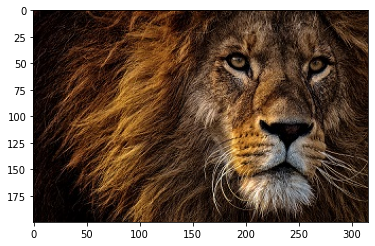

In [26]:
img = cv.imread("pic/lion200x316.jpg")
img2 = img.copy()
show(img)

### 9.1 线段

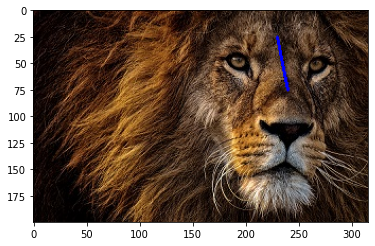

In [27]:
img = img2.copy()
pt1 = (230, 25)
pt2 = (240, 75)
cv.line(img, pt1, pt2, (255, 0, 0), 2)
show(img)

### 9.2 矩形

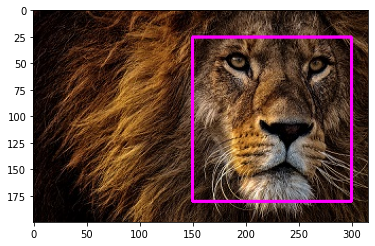

In [28]:
img = img2.copy()

cv.rectangle(img, (150, 25), (300, 180), (255,0,255), 2)
# cv.rectangle(img, (150, 25), (300, 180), (255,0,255), -1)
show(img)

### 9.3 多边形

[[[150  25]]

 [[300  25]]

 [[240 180]]]


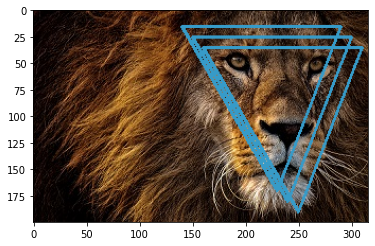

In [31]:
img = img2.copy()

pts = np.array([
    [150, 25],
    [300, 25],
    [240, 180]
])
pts = pts.reshape((-1, 1, 2))
print(pts)

cv.polylines(img, [pts, pts+10, pts-10], True, (200,155,55), 2)

show(img)

### 9.4 圆

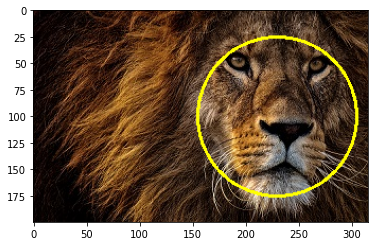

In [22]:
img = img2.copy()

cv.circle(img, (230, 100), 75, (0,255,255), 2)
# cv.circle(img, (230, 100), 75, (0,255,255), -1)

show(img)

### 9.5 椭圆

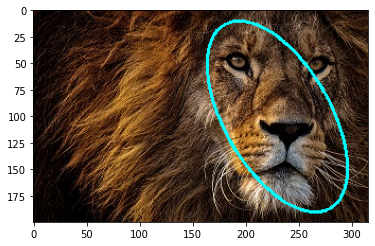

In [23]:
img = img2.copy()

rotated_rect = ((230,100), (100, 200), -30) #((中心), (外接矩形), 角度)
cv.ellipse(img, rotated_rect, (255,255,0), 2)

show(img)

### 9.6 放置文本

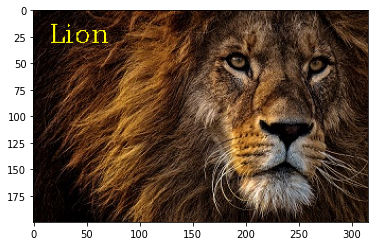

In [31]:
img = img2.copy()
# img, text, 位置, 
cv.putText(img, "Lion", (15, 30), cv.FONT_HERSHEY_COMPLEX, 0.8, (0,255,255))

show(img)

### 9.7 轮廓绘制

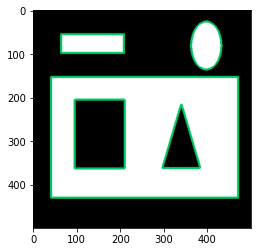

In [101]:
img = cv.imread('pic/contour_bin.png', -1)
cnts, hiers = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

img2 = cv.merge([img, img, img])
img2 = cv.drawContours(img2, cnts, -1, (100, 200, 0), 3)

show(img2)

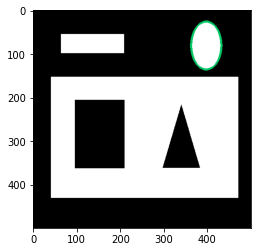

In [182]:
img2 = cv.merge([img, img, img])
img2 = cv.drawContours(img2, cnts, 4, (100, 200, 0), 3)
show(img2)

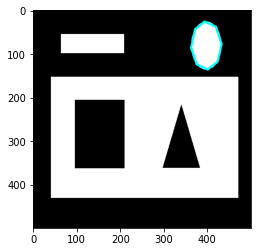

In [105]:
## 轮廓近似
cnt = cnts[4]
# 轮廓近似
epsilon = 0.02*cv.arcLength(cnt, True)
cnt_approx = cv.approxPolyDP(cnt, epsilon, True)

img3 = cv.merge([img, img, img])
cv.drawContours(img3, [cnt_approx], 0, (255,255,0), 3)

show(img3)

## 9.8 轮廓继承

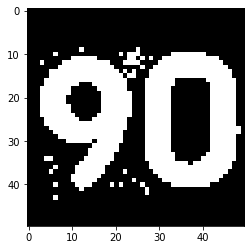

In [108]:
img = cv.imread('pic/ninety_bin50x50.png', -1)

show(img)

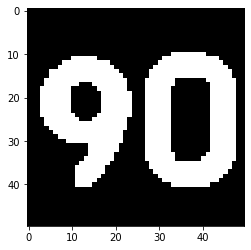

In [131]:
K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))

img = cv.morphologyEx(img, cv.MORPH_OPEN, K)
img = cv.morphologyEx(img, cv.MORPH_CLOSE, K)

show(img)

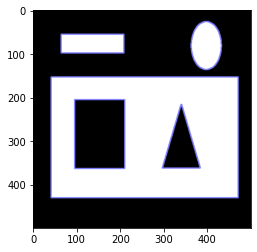

In [176]:
conts, hiers = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

rgb = cv.merge([img, img, img])
cv.drawContours(rgb, conts, -1, (255, 125, 125), 2)
show(rgb)

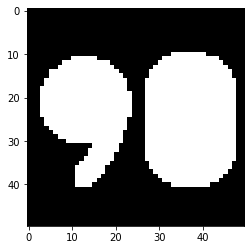

In [129]:
img2 = img.copy()

for cnt, hie in zip(conts, hiers[0]):
    if hie[3] != -1:
        cv.fillPoly(img2, [cnt], 255) # 注：此函数过于强大
        
show(img2)

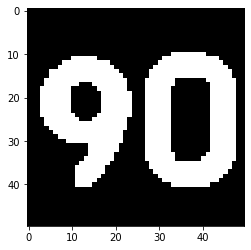

In [143]:
img3 = np.zeros_like(img)

img3 = cv.fillPoly(img3, conts, 255)

show(img3)

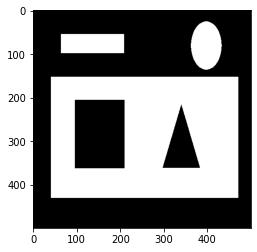

(500, 500)

In [94]:
img = cv.imread('pic/contour.png', -1)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.resize(img_gray, (500, 500))

_, img_bin = cv.threshold(img_gray, 120, 255, 0)
show(img_bin)

img_bin.shape

In [100]:
_, h1 = cv.findContours(img_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print(h1)

[[[ 3 -1  1 -1]
  [ 2 -1 -1  0]
  [-1  1 -1  0]
  [ 4  0 -1 -1]
  [-1  3 -1 -1]]]


In [153]:
cv.imwrite('pic/contour_bin.png', img_bin)

True

## 实例：目标提取

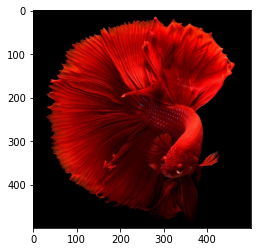

In [4]:
obj = cv.imread('pic/goldfish500x500.jpg')
shape = (500, 500)

show(obj)

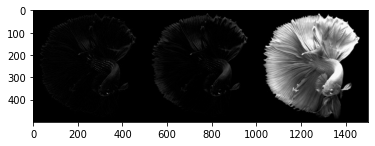

In [5]:
b, g, red = cv.split(obj)
show(np.hstack([b, g, red]))

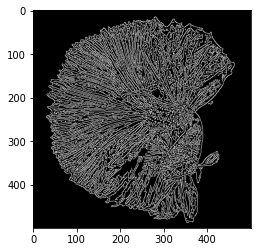

In [6]:
edge1 = cv.Canny(red, 5, 50)

show(edge1)

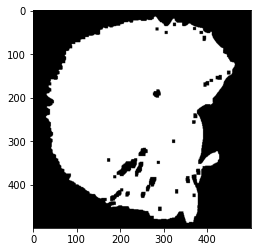

In [8]:
K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
edge2 = cv.morphologyEx(edge1, cv.MORPH_CLOSE, K, iterations=3)

show(edge2)

In [9]:
cnts, hiers = cv.findContours(edge2, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

In [50]:
max_cnt = [cnt for cnt in cnts if cv.contourArea(cnt) > 300*300]

print(max_cnt)

[array([[[279,  15]],

       [[277,  17]],

       [[277,  20]],

       ...,

       [[284,  19]],

       [[284,  18]],

       [[281,  15]]], dtype=int32)]


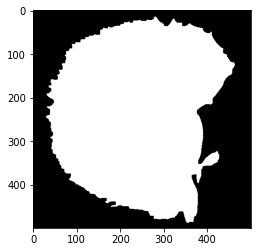

In [11]:
mask = np.zeros(shape, dtype=np.uint8)

for cnt, hie in zip(cnts, hiers[0]):
    if hie[3] == -1:
        cv.drawContours(mask, [cnt], -1, 255, -1)

show(mask)

In [91]:
goldfish = np.vstack([img.transpose(2,0,1), mask.reshape(1, 500, 500)]).transpose(1,2,0)

In [93]:
cv.imwrite('pic/goldfish_select.png', goldfish)

True